# Module 2: Data wrangling using `pandas`

## Overview: Clean vs. dirty geochronology datasets
This notebook will take you through python code to import, sort, and make some very basic plots of some U-Pb detrital zircon geochronology data using `pandas`. We will look at one nicely cleaned dataset, and anothrer dataset that is messier, and needs some wrangling before we can play with it.

For questions on this notebook, ask them on the [GEOL 557 slack](https://join.slack.com/t/minesgeo/shared_invite/zt-cqawm4lu-Zcfpf4mBLwjnksY6_umlKA)<a href="https://join.slack.com/t/minesgeo/shared_invite/zt-cqawm4lu-Zcfpf4mBLwjnksY6_umlKA">
<img src="https://cdn.brandfolder.io/5H442O3W/as/pl546j-7le8zk-ex8w65/Slack_RGB.svg" alt="Go to the GEOl 557 slack" width="100">
</a>

## Instructions
Work through this notebook - there will be several places where you need to fill-in-the-blank or write some code into an open cell. When you are finished, make sure to use the Colab menu (not the browser-level menu) to do the following:
- Expand all the sections - in the Colab menu, choose View --> Expand sections) 
- Save the notebook as a pdf, again using the Colab menu, using File --> Print --> Save as PDF. 

--- 
## Course
**GEOL 557 Earth Resource Data Science I: Fundamentals**. GEOL 557 forms part 2 of the four-part course series for the "Earth Resource Data Science" online graduate certificate at Mines - [learn more about the certificate here](https://online.mines.edu/er/)

Notebook created by **Zane Jobe** and **Thomas Martin**, [CoRE research group](https://core.mines.edu), Colorado School of Mines

In [1]:
import pandas as pd # this imports pandas to this notebook
import numpy as np
from matplotlib import pyplot as plt

# these next two things shuoldnt need to be changed if you set up your Google Drive folder correctly (see Module 1)
folder_path = '../1_data/' # makes a path
file_name = 'Sharman_ExampleDataset_1.xlsx' # file name

## Let's load in a dataset
The data we want is located here https://github.com/grsharman/detritalPy/blob/master/detritalPy/example-data/ExampleDataset_1.xlsx

It is downloaded and saved in the Google Drive folder. 

We load it with the pandas `read_xls` function into a DataFrame called `df`:

In [3]:
df=pd.read_excel(folder_path + file_name, sheet_name='ZrUPb', engine='openpyxl') # uses pandas to read in the csv as a 'DataFrame' called df
df.head()

,Sample_ID,Grain_ID,Analysis_ID,206Pb_204Pb,U_ppm,U_Th,Th_U,207Pb_206Pb,207Pb_206Pb_err,207Pb_235U,...,68Age,68Age_err,76Age,76Age_err,BestAge,BestAge_err,Disc,ZHe_Age,ZHe_Age_err,RimCore
0,POR-2,NaN,POR-2-64,187.562603,2454.0,1.593317,0.627621,0.040688,0.005553,0.037519,...,42.969196,0.800852,-307.078907,350.590494,42.969196,0.800852,NaN,NaN,NaN,NaN
1,POR-2,NaN,POR-2-85,400.690026,1830.0,2.015693,0.496107,0.046028,0.007520,0.046150,...,46.708420,0.651555,-0.892810,396.082033,46.708420,0.651555,NaN,NaN,NaN,NaN
2,POR-2,NaN,POR-2-33,1727.768911,18460.0,19.197699,0.052090,0.046373,0.000795,0.048013,...,48.226943,0.999377,17.007509,41.201972,48.226943,0.999377,NaN,NaN,NaN,NaN
3,POR-2,NaN,POR-2-82,1535.301774,19514.0,5.805308,0.172256,0.046624,0.001008,0.048465,...,48.417302,0.921306,30.016655,51.812993,48.417302,0.921306,NaN,NaN,NaN,NaN
4,POR-2,NaN,POR-2-7,299.211125,2332.0,1.529990,0.653599,0.042033,0.004611,0.044318,...,49.108359,0.547924,-224.552689,276.898362,49.108359,0.547924,NaN,NaN,NaN,NaN


Nice! Let's make sure the dtypes are correct:

In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1184 entries, 0 to 1183
Data columns (total 26 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   Sample_ID        1184 non-null   object 
 1   Grain_ID         0 non-null      float64
 2   Analysis_ID      1184 non-null   object 
 3   206Pb_204Pb      589 non-null    float64
 4   U_ppm            1184 non-null   float64
 5   U_Th             1184 non-null   float64
 6   Th_U             1184 non-null   float64
 7   207Pb_206Pb      1184 non-null   float64
 8   207Pb_206Pb_err  1184 non-null   float64
 9   207Pb_235U       1184 non-null   float64
 10  207Pb_235U_err   1184 non-null   float64
 11  206Pb_238U       1184 non-null   float64
 12  206Pb_238U_err   1184 non-null   float64
 13  RHO              1184 non-null   float64
 14  75Age            1184 non-null   float64
 15  75Age_err        1183 non-null   float64
 16  68Age            1184 non-null   float64
 17  68Age_err     

Excellent - I wish all data files were formatted like that. Let's check out a description of the data:

In [5]:
df.describe()

,Grain_ID,206Pb_204Pb,U_ppm,U_Th,Th_U,207Pb_206Pb,207Pb_206Pb_err,207Pb_235U,207Pb_235U_err,206Pb_238U,...,68Age,68Age_err,76Age,76Age_err,BestAge,BestAge_err,Disc,ZHe_Age,ZHe_Age_err,RimCore
count,0.0,589.000000,1.184000e+03,1184.000000,1184.000000,1184.000000,1184.000000,1184.000000,1184.000000,1184.000000,...,1184.000000,1184.000000,625.000000,625.000000,1184.000000,1184.000000,0.0,0.0,0.0,0.0
mean,NaN,488.143662,1.535729e+04,2.660451,0.571404,0.053841,0.004100,0.449679,0.019499,0.039633,...,237.506342,4.827252,285.044004,289.446382,248.472298,4.791130,NaN,NaN,NaN,NaN
std,NaN,401.628866,6.010806e+04,3.485530,0.355032,0.018079,0.017931,1.377295,0.080965,0.070476,...,388.856896,9.456529,664.797347,327.423335,422.322410,8.445739,NaN,NaN,NaN,NaN
min,NaN,27.043019,2.330000e+01,0.325100,0.016160,0.018146,0.000143,0.037519,0.000850,0.006688,...,42.969196,0.310222,-3087.582303,0.000000,42.969196,0.310222,NaN,NaN,NaN,NaN
25%,NaN,212.240881,3.542250e+02,1.440044,0.351865,0.047596,0.000800,0.100513,0.003250,0.015208,...,97.261275,1.436355,13.499498,86.000000,97.261275,1.436355,NaN,NaN,NaN,NaN
50%,NaN,382.879604,1.582590e+03,2.039231,0.490381,0.049334,0.001432,0.144072,0.005756,0.021930,...,139.641154,2.176547,115.670764,186.132997,139.641154,2.176547,NaN,NaN,NaN,NaN
75%,NaN,639.357573,1.182978e+04,2.842000,0.694425,0.051800,0.004197,0.184492,0.016409,0.026100,...,166.050169,4.205218,241.342989,368.796567,166.050169,4.159157,NaN,NaN,NaN,NaN
max,NaN,2912.198355,1.217614e+06,61.881165,3.075977,0.260038,0.564884,22.230823,1.954081,0.620036,...,3110.061838,208.441511,3246.929227,3309.686674,3246.929227,107.311590,NaN,NaN,NaN,NaN


In [6]:
df.groupby('Sample_ID').BestAge.describe()

,count,mean,std,min,25%,50%,75%,max
Sample_ID,,,,,,,,
BUT-1,100.0,270.821084,432.974949,81.909284,104.723150,159.566275,197.770412,2840.000000
BUT-2,99.0,255.744154,415.649604,77.217434,98.253280,153.425129,172.497076,2240.000000
BUT-3,100.0,218.253463,344.665800,67.113260,96.926225,150.370502,164.220574,1850.000000
BUT-4,99.0,261.970724,392.254698,85.977323,143.788676,161.838069,168.596222,1797.899348
BUT-5,96.0,329.429600,550.431616,79.957142,97.059649,150.096633,170.723591,3246.929227
POR-1,100.0,200.023693,361.083596,43.435009,95.190867,103.187945,120.019771,1896.928018
POR-2,97.0,296.816210,528.122072,42.969196,95.091671,105.071041,123.492473,2468.478322
POR-3,101.0,190.515164,413.503765,45.138314,94.049496,103.518484,121.731815,3179.874635
SEF-1,99.0,197.404483,314.881477,79.781044,96.516449,145.490278,161.381595,1790.000000


In [7]:
df.groupby('Sample_ID').size() # number of rows per sample

Sample_ID
BUT-1    100
BUT-2     99
BUT-3    100
BUT-4     99
BUT-5     96
POR-1    100
POR-2     97
POR-3    101
SEF-1     99
SJB-1     96
TEJ-1    100
TEJ-2     97
dtype: int64

In [8]:
df.groupby('Sample_ID').BestAge.max() # oldest Age per sample (could also do min, mean, median, etc.)

Sample_ID
BUT-1    2840.000000
BUT-2    2240.000000
BUT-3    1850.000000
BUT-4    1797.899348
BUT-5    3246.929227
POR-1    1896.928018
POR-2    2468.478322
POR-3    3179.874635
SEF-1    1790.000000
SJB-1    2598.543911
TEJ-1    2030.000000
TEJ-2    1714.000000
Name: BestAge, dtype: float64

<Axes: >

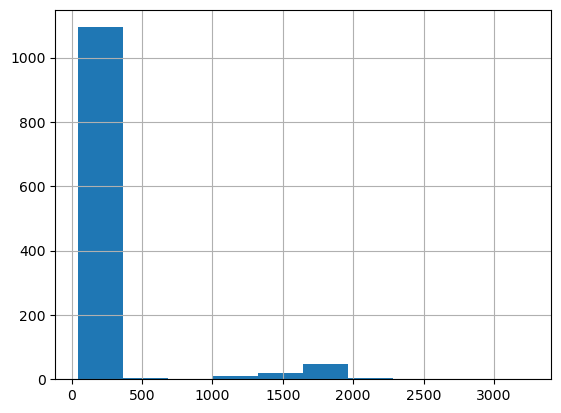

In [9]:
df.BestAge.hist() # all ages as a histogram

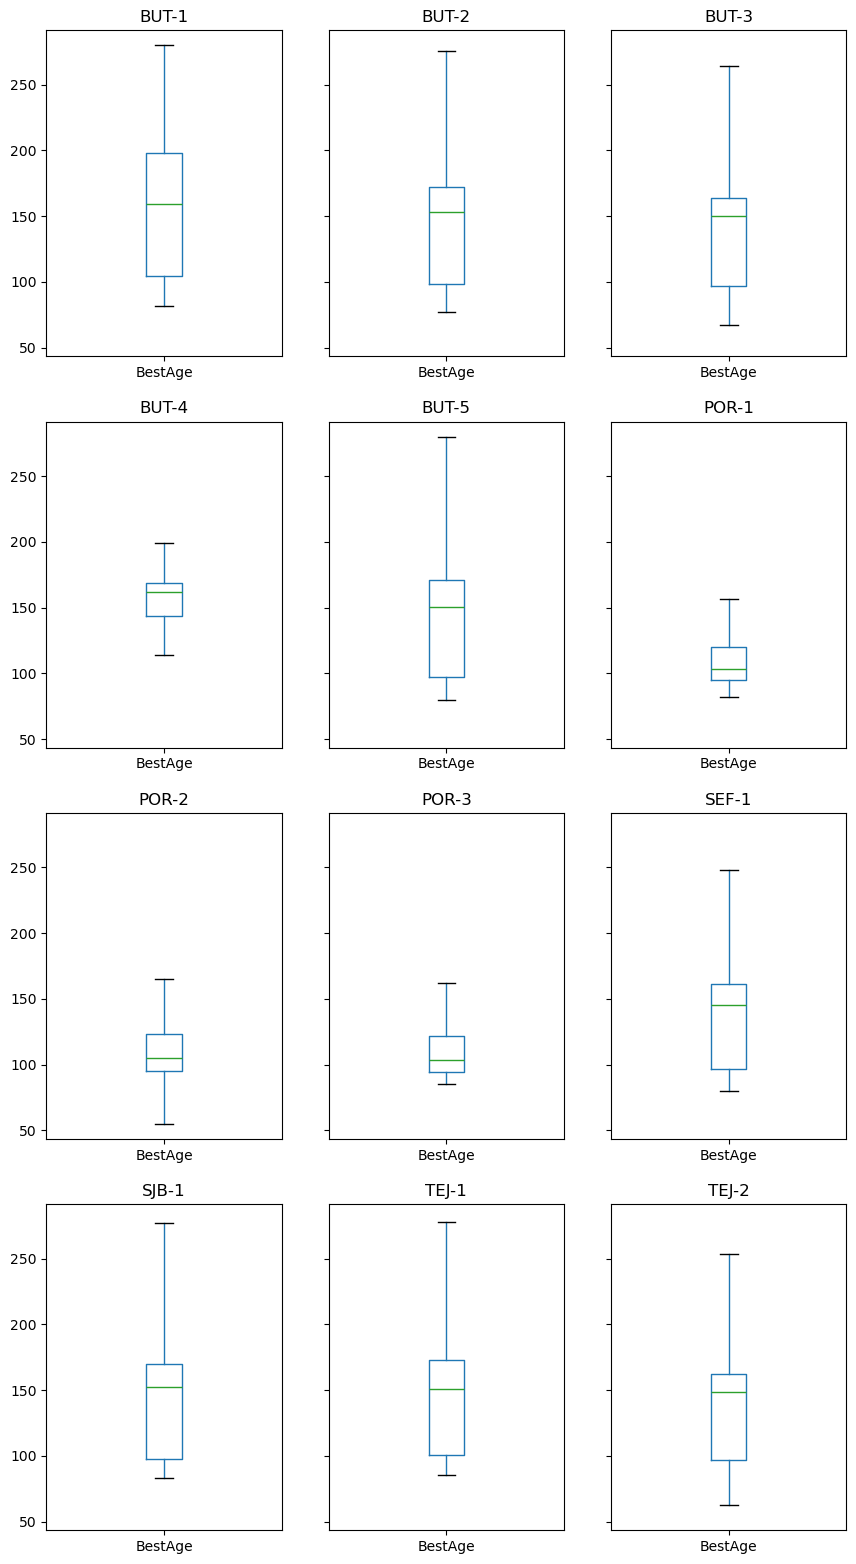

In [10]:
# each sample as a separate box plot
df.groupby('Sample_ID').boxplot(column=['BestAge'], grid=False, showfliers=False, figsize=[10,20], sharey=True)
plt.show()

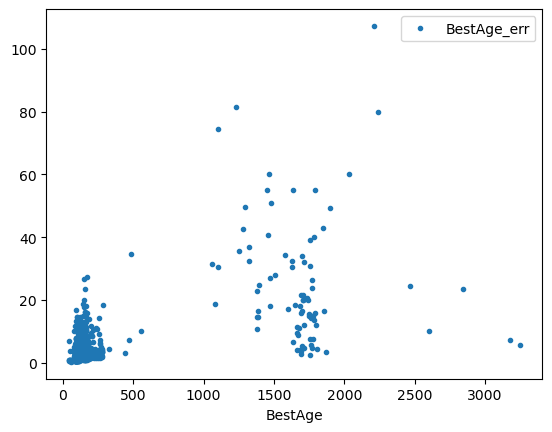

In [11]:
df.plot(x='BestAge', y='BestAge_err', style='.');

### Now you try
Make a plot using one of the built-in pandas plotting methods - anything you want! 

In [12]:
# your code goes here

![I did it](https://media1.tenor.com/images/a5747f7b1d84287ca4a62e8a428d51ae/tenor.gif?itemid=4990241)

# Some not-so-easy geochronology data

Ok, now it's time for the not-so-easy dataset. Here goes:

In [13]:
# these next two things shuoldnt need to be changed if you set up your Google Drive folder correctly (see Module 1)
folder_path = '../1_data/' # makes a path
file_name = 'Daniels_GSA_2017304_appendix2.xlsx' # file name

## Let's load in a dataset
The data we want is located here https://doi.org/10.1130/B31757.1 It is the Appendix 2 file ("Supplemental Information 2" down at the bottom   of the   page). Two tabs in that xlsx are useful to us, the "high throughput" and "low throughput" tabs, which are U-Pb ages from detrital zircons from the Magallanes Basin, Chile. Also, by default, `pandas` imports the first sheet, but we also want to specify that, so we use `sheet_name` for that. 

Before we load the data, the Excel file is weird, and has a linked IsoPlot function in the file that needs to be broken/deleted. I took care of breaking this link and saving as a new file, which fixes weird encryption issues with Excel format. Yet another reason to just use a csv file... 

We load it with the pandas `read_xls` function into a DataFrame called `df`:

In [14]:
df=pd.read_excel(folder_path + file_name, sheet_name='HighThroughputAges - LA-ICP-MS') # uses pandas to read in the csv as a 'DataFrame' called df
df.head()

/opt/conda/envs/csm-2024-fall/lib/python3.11/site-packages/openpyxl/worksheet/_reader.py:329: UserWarning: Unknown extension is not supported and will be removed
  warn(msg)


,"University of Calgary, Centre for Pure and Applied Tectonics and Thermochronology",Unnamed: 1,Unnamed: 2,Unnamed: 3,Unnamed: 4,Unnamed: 5,Unnamed: 6,Unnamed: 7,Unnamed: 8,Unnamed: 9,...,Unnamed: 32,Unnamed: 33,Unnamed: 34,Unnamed: 35,Unnamed: 36,Unnamed: 37,Unnamed: 38,Unnamed: 39,Unnamed: 40,Unnamed: 41
0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,15-CC-01 HT,NaN,f206c,207Pb CPS,206Pb CPS,U (ppm)1,U/Th,206Pb/204Pb,1σ %,Data for Tera-Wasserburg plot2,...,2σx (ABS),2σtotal (ABS),Prob. Conc. (%),% conc3,Comments,Accepted Dates4,NaN,NaN,NaN,NaN
2,Sample,Spot,NaN,NaN,NaN,NaN,NaN,NaN,NaN,238U/206Pb,...,NaN,NaN,NaN,NaN,NaN,Date (Ma),2σx (ABS),2σx (%),2σtotal (ABS),2σtotal (%)
3,UK012,UK012_356,NaN,50,1110,114.4,1.396825,NaN,NaN,100,...,NaN,NaN,71.822911,NaN,NaN,64.143954,4.777458,7.448025,4.842839,7.5119
4,UK012,UK012_576,NaN,378,8100,886,2.155718,NaN,NaN,95.510984,...,NaN,NaN,96.552144,NaN,NaN,67.143073,2.772284,4.128921,2.893859,4.308652


Hmm, that doesnt look right. There are a few header lines, which are messing up the key names (currently in row `1`. You could go into Excel and delete them, but it's good practice to modify the input file as little as possible. Also, there are 13 samples and two tabs, so that means you would have to fix these issues 26 times manually, which is sub-optimal. Let's automate the boring stuff!

In [15]:
df=pd.read_excel(folder_path + file_name, sheet_name='HighThroughputAges - LA-ICP-MS', skiprows=2) # uses pandas to read in the csv as a 'DataFrame' called df
df.head()

/opt/conda/envs/csm-2024-fall/lib/python3.11/site-packages/openpyxl/worksheet/_reader.py:329: UserWarning: Unknown extension is not supported and will be removed
  warn(msg)


,15-CC-01 HT,Unnamed: 1,f206c,207Pb CPS,206Pb CPS,U (ppm)1,U/Th,206Pb/204Pb,1σ %,Data for Tera-Wasserburg plot2,...,2σx (ABS),2σtotal (ABS),Prob. Conc. (%),% conc3,Comments,Accepted Dates4,Unnamed: 38,Unnamed: 39,Unnamed: 40,Unnamed: 41
0,Sample,Spot,NaN,NaN,NaN,NaN,NaN,NaN,NaN,238U/206Pb,...,NaN,NaN,NaN,NaN,NaN,Date (Ma),2σx (ABS),2σx (%),2σtotal (ABS),2σtotal (%)
1,UK012,UK012_356,NaN,50,1110,114.4,1.396825,NaN,NaN,100,...,NaN,NaN,71.822911,NaN,NaN,64.143954,4.777458,7.448025,4.842839,7.5119
2,UK012,UK012_576,NaN,378,8100,886,2.155718,NaN,NaN,95.510984,...,NaN,NaN,96.552144,NaN,NaN,67.143073,2.772284,4.128921,2.893859,4.308652
3,UK012,UK012_632,NaN,149,2760,282,1.883768,NaN,NaN,95.147479,...,NaN,NaN,2.107021,NaN,NaN,67.398252,3.416051,5.068456,3.516174,5.179927
4,UK012,UK012_236,NaN,506,9180,787,1.834499,NaN,NaN,94.607379,...,NaN,NaN,1.142421,NaN,NaN,67.781003,2.978825,4.394779,3.094405,4.479329


OK, that's a bit better, but still not great. If you look at the Excel, it has empty rows to separate the samples, and merged rows to indicate column names and subnames. This looks snazzy in Excel, but is a pain when doing data analysis because it means that one row is empty (hence the `Unnamed:1` as the second column name. 

First, let's get rid of the empty rows:

In [16]:
print('df has length', len(df), 'before dropping rows with no data')
df.dropna(how='all', inplace=True)
print('df has length', len(df), 'after dropping rows with no data')

df has length 8298 before dropping rows with no data
df has length 8273 after dropping rows with no data


Now to deal with the column names. Ideally, we would rename the column names so that the name and the subname is in each, like this first example:

In [17]:
df.rename({'Data for Tera-Wasserburg plot2'	: 'TeraWasserburg_238U/206Pb'},axis=1, inplace=True)
df.head()

,15-CC-01 HT,Unnamed: 1,f206c,207Pb CPS,206Pb CPS,U (ppm)1,U/Th,206Pb/204Pb,1σ %,TeraWasserburg_238U/206Pb,...,2σx (ABS),2σtotal (ABS),Prob. Conc. (%),% conc3,Comments,Accepted Dates4,Unnamed: 38,Unnamed: 39,Unnamed: 40,Unnamed: 41
0,Sample,Spot,NaN,NaN,NaN,NaN,NaN,NaN,NaN,238U/206Pb,...,NaN,NaN,NaN,NaN,NaN,Date (Ma),2σx (ABS),2σx (%),2σtotal (ABS),2σtotal (%)
1,UK012,UK012_356,NaN,50,1110,114.4,1.396825,NaN,NaN,100,...,NaN,NaN,71.822911,NaN,NaN,64.143954,4.777458,7.448025,4.842839,7.5119
2,UK012,UK012_576,NaN,378,8100,886,2.155718,NaN,NaN,95.510984,...,NaN,NaN,96.552144,NaN,NaN,67.143073,2.772284,4.128921,2.893859,4.308652
3,UK012,UK012_632,NaN,149,2760,282,1.883768,NaN,NaN,95.147479,...,NaN,NaN,2.107021,NaN,NaN,67.398252,3.416051,5.068456,3.516174,5.179927
4,UK012,UK012_236,NaN,506,9180,787,1.834499,NaN,NaN,94.607379,...,NaN,NaN,1.142421,NaN,NaN,67.781003,2.978825,4.394779,3.094405,4.479329


There are smarter, more automated ways to do that (using a loop or `.apply` methods), but that's a topic for another day. 

In this case, we don't really want to fool around with all those columns anyways - what we are really interested in are the ages, and so we can just drop all the columns that don't have age information. 

In [18]:
#renames the columns first
col_dict = {'15-CC-01 HT':'Sample', 
            'Unnamed: 1':'Spot', 
            'Dates':'Age_207Pb/206Pb', 
            'Unnamed: 25':'Age_206Pb/238U', 
            'Unnamed: 28':'Age_207Pb/235Pb', 
            'Accepted Dates4':'Age_Accepted'
           }

df.rename(col_dict, axis=1, inplace=True) # axis 1 acts on the columns

# now let's drop all the columns we didnt rename
col_list = list(col_dict.values())
df = df.filter(col_list, axis=1) # reassign it
df.head()

,Sample,Spot,Age_207Pb/206Pb,Age_206Pb/238U,Age_207Pb/235Pb,Age_Accepted
0,Sample,Spot,207Pb/206Pb,206Pb/238U,207Pb/235Pb,Date (Ma)
1,UK012,UK012_356,NaN,64.143954,67.693053,64.143954
2,UK012,UK012_576,NaN,67.143073,67.342643,67.143073
3,UK012,UK012_632,NaN,67.398252,80.586226,67.398252
4,UK012,UK012_236,NaN,67.781003,77.743952,67.781003


In [19]:
# get rid of first line
df.drop(0,axis=0, inplace=True) # axis 0 works on the rows
df.head()

,Sample,Spot,Age_207Pb/206Pb,Age_206Pb/238U,Age_207Pb/235Pb,Age_Accepted
1,UK012,UK012_356,NaN,64.143954,67.693053,64.143954
2,UK012,UK012_576,NaN,67.143073,67.342643,67.143073
3,UK012,UK012_632,NaN,67.398252,80.586226,67.398252
4,UK012,UK012_236,NaN,67.781003,77.743952,67.781003
5,UK012,UK012_442,NaN,68.163731,73.47286,68.163731


And lastly, from the way that xls was formatted, there should be some extra rows that only had values in the first column that we renamed to `Sample`, so let's look at that column:

In [20]:
print(df.Sample.value_counts())
print(df.Sample.value_counts().values)


Sample
UK006                                                                                                                                                                                                                                                                                                                                                  640
Uk008                                                                                                                                                                                                                                                                                                                                                  640
UK009                                                                                                                                                                                                                                                                                                      

Whoa, lots of weird things there. The way that xls is formatted is really not great! It would be smart to replace the sample names beginning with `UK` with the ones beginning with `15-`, but for now we won't mess with that. Let's just get rid of the rows that only have data in the `Sample` column, and no other data:

In [21]:
# Which columns have NaNs
df.isnull().sum()

Sample                0
Spot                 32
Age_207Pb/206Pb    5595
Age_206Pb/238U       32
Age_207Pb/235Pb      32
Age_Accepted       1588
dtype: int64

See the 32 in Spot? There shouldn't be any NaNs there either, if each `Spot` is part of a `Sample`. So, let's get rid of rows where Spot is NaN

In [22]:
# get rid of all rows where Spot is NaN
df.dropna(axis=0, subset = ['Spot'], inplace=True)

# now check the samples
print(df.isnull().sum())
print(df.Sample.value_counts())

Sample                0
Spot                  0
Age_207Pb/206Pb    5575
Age_206Pb/238U        0
Age_207Pb/235Pb       0
Age_Accepted       1568
dtype: int64
Sample
Uk008     640
UK006     640
UK009     639
UK007     639
UK003     639
UK013     638
UK011     638
UK001     638
UK004     638
UK002     634
UK012     632
UK005     623
UK010     590
Sample     12
Name: count, dtype: int64


Great! That means we have 12 Samples, , with around 640 ages per sample. 

Last thing we need to do is to convert the `objects` to other dtypes:

In [23]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 8240 entries, 1 to 8288
Data columns (total 6 columns):
 #   Column           Non-Null Count  Dtype 
---  ------           --------------  ----- 
 0   Sample           8240 non-null   object
 1   Spot             8240 non-null   object
 2   Age_207Pb/206Pb  2665 non-null   object
 3   Age_206Pb/238U   8240 non-null   object
 4   Age_207Pb/235Pb  8240 non-null   object
 5   Age_Accepted     6672 non-null   object
dtypes: object(6)
memory usage: 450.6+ KB


In [24]:
# get rid of strings in the age columns
df[df.columns[2:6]] = df[df.columns[2:6]].apply(pd.to_numeric, errors='coerce').fillna(0).astype(float).dropna()
# you can read about the coerce method on the pandas website

In [25]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 8240 entries, 1 to 8288
Data columns (total 6 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   Sample           8240 non-null   object 
 1   Spot             8240 non-null   object 
 2   Age_207Pb/206Pb  8240 non-null   float64
 3   Age_206Pb/238U   8240 non-null   float64
 4   Age_207Pb/235Pb  8240 non-null   float64
 5   Age_Accepted     8240 non-null   float64
dtypes: float64(4), object(2)
memory usage: 450.6+ KB


### Whew! 
Ok, that took a bit of work, and you might think you can do this faster in Excel, and you are probably correct. but think about if instead of one spreadsheet, you had 55 or 550 of these spreadsheets to deal with - still want to do it in Excel? 

### Now let's try a simple plot:

<Axes: xlabel='Age_207Pb/206Pb', ylabel='Age_206Pb/238U'>

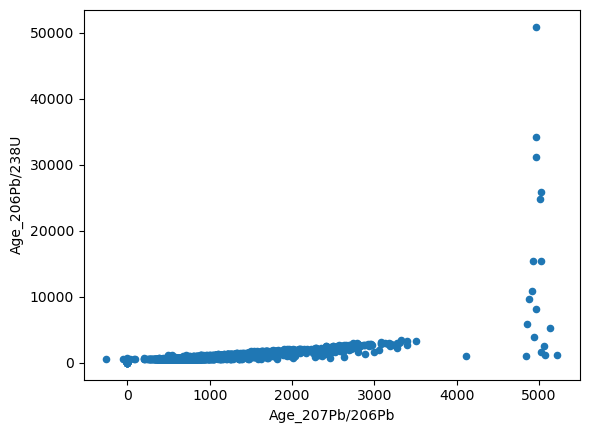

In [26]:
df.plot.scatter(x='Age_207Pb/206Pb', y='Age_206Pb/238U')

In [27]:
df['Age_206Pb/238U'].max()

50935.55103170099

<Axes: xlabel='Age_207Pb/206Pb', ylabel='Age_206Pb/238U'>

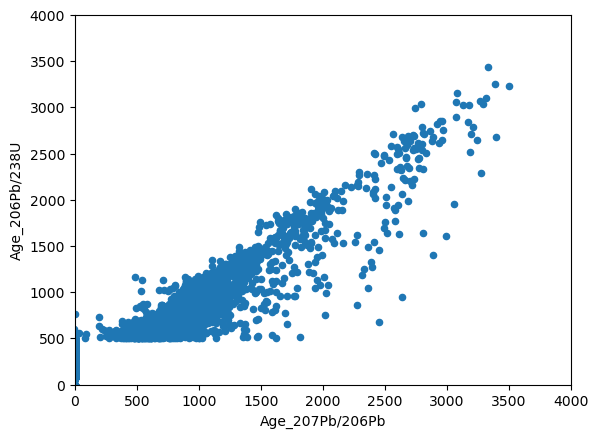

In [28]:
df.plot.scatter(x='Age_207Pb/206Pb', y='Age_206Pb/238U', xlim=[0, 4000], ylim=[0,4000])

In [29]:
### Now you try - for example, do a `describe()` on a column and a `hist` of ages (you can choose the column you want to plot)

In [30]:
# your code here

### Now let's export that clean dataset as a csv
Search the pandas documention to figure out how to export a csv of this dataset you have just cleaned up

In [31]:
# your code here

![Robert Redford](https://media1.tenor.com/images/3952a85da6e63c7755607a40a4bc975f/tenor.gif?itemid=4959267)